# Notebook de preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## Ressources

* https://github.com/lfsimoes/mars_express__esn (contient la liste des gits des meilleurs team)
* https://kelvins.esa.int/mars-express-power-challenge/data/ (à lire !!)

In [2]:
FOLDER = "data/train_set/"
FEATURES = ['dmop', 'saaf', 'ftl', 'evtf', 'ltdata']
N_VAL = 500
YEAR = 2012

**Solar aspect angles (SAAF):**

* solar angles: sa, sx, sy, sz
* cosines of solar angles
* density, i.e. number of measurements in 1s intervals

**Events Files (EVTF):**

* indicators for occultation and penumbra/umbra events
* indicator for current nadir pointing direction (N-to-S or S-to-N)
* indicator for current Earth pointing direction (N-to-S or S-to-N)
* MEX's current/last position above Mars reference ellipsoid
* MEX's trajectory direction (ascend/descend) w.r.t. the Mars reference ellipsoid

**Flight Dynamics TimeLine (FTL):**

* indicators (one-hot encoding) of each event
* indicator of the communication device being used
 
**Detailed Mission Operations Plan (DMOP):**

* indicator (one-hot encoding) of each command for each subsystem (i.e. last triggered command)
* amount of command changes in the last hour for each subsystem

**Long-term data (LTDATA):**

* as is

In [3]:
## Query regex unix
query_all = f"{FOLDER}*" # regex: tout ce qui commence par "FOLDER"

file_name_list = glob.glob(query_all) 
# execute un "ls" sur le query passé en argument, donc retourne tous 
# les fichiers contenus dans le dossier "FOLDER" isi
file_name_list

['data/train_set/context--2012-05-27_2014-04-14--dmop.csv',
 'data/train_set/context--2012-05-27_2014-04-14--saaf.csv',
 'data/train_set/power--2008-08-22_2010-07-10.csv',
 'data/train_set/context--2008-08-22_2010-07-10--ftl.csv',
 'data/train_set/context--2012-05-27_2014-04-14--evtf.csv',
 'data/train_set/power--2010-07-10_2012-05-27.csv',
 'data/train_set/context--2012-05-27_2014-04-14--ftl.csv',
 'data/train_set/context--2010-07-10_2012-05-27--ftl.csv',
 'data/train_set/context--2010-07-10_2012-05-27--ltdata.csv',
 'data/train_set/context--2010-07-10_2012-05-27--evtf.csv',
 'data/train_set/context--2008-08-22_2010-07-10--dmop.csv',
 'data/train_set/power--2012-05-27_2014-04-14.csv',
 'data/train_set/context--2012-05-27_2014-04-14--ltdata.csv',
 'data/train_set/context--2008-08-22_2010-07-10--saaf.csv',
 'data/train_set/context--2008-08-22_2010-07-10--ltdata.csv',
 'data/train_set/context--2008-08-22_2010-07-10--evtf.csv',
 'data/train_set/context--2010-07-10_2012-05-27--saaf.csv',
 

In [5]:
def plot_group(data, n_val):
    """
    Gather all columns of a dataframe, plot them stacked up to 
    the n_val value (if not the computer crashes because of RAM usage)
    """
    group = list(data.columns)
    fig, ax = plt.subplots(len(group), 1, figsize=(15,1.5 * len(group)))
    k = 0
    for col in group:
        ax[k].plot(data[col][:n_val])
        ax[k].set_title(col,y=0.5,loc="right")
        k+=1
    plt.show()

def selection(folder = FOLDER, search = "*", first = False):
    """
    Return a list of file in a folder following a search query. Return the name of the user selected file.
    If first, output the first result of the query
    """
    query_list = glob.glob(f"{folder}*{search}*")
    query_list_formated = [s.split(folder)[1] for s in query_list]
    query_list_formated_numbered  = [f'{i} - {query_list_formated[i]}' for i in range(len(query_list_formated))]
    if not first :
        for c in query_list_formated_numbered:
            print(c)
        cin = input("Selection : ")
        print(query_list_formated_numbered[int(cin)])
        return query_list[int(cin)]
    else: 
        return query_list[0]

### Plot des 500 premières valeurs de toutes les colonnes du dataframe, sans traitement, pour chaque dataframe de variables quantitatives

In [5]:
def analyse_brute():
    """
    User select a file from a file list, import the file and plot column values
    up to N_VAL
    """
    file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
    data = pd.read_csv(file_name, sep=",", index_col=0)
    plot_group(data, N_VAL)

### POWER

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  3


3 - power--2010-07-10_2012-05-27.csv


/home/yamsok/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


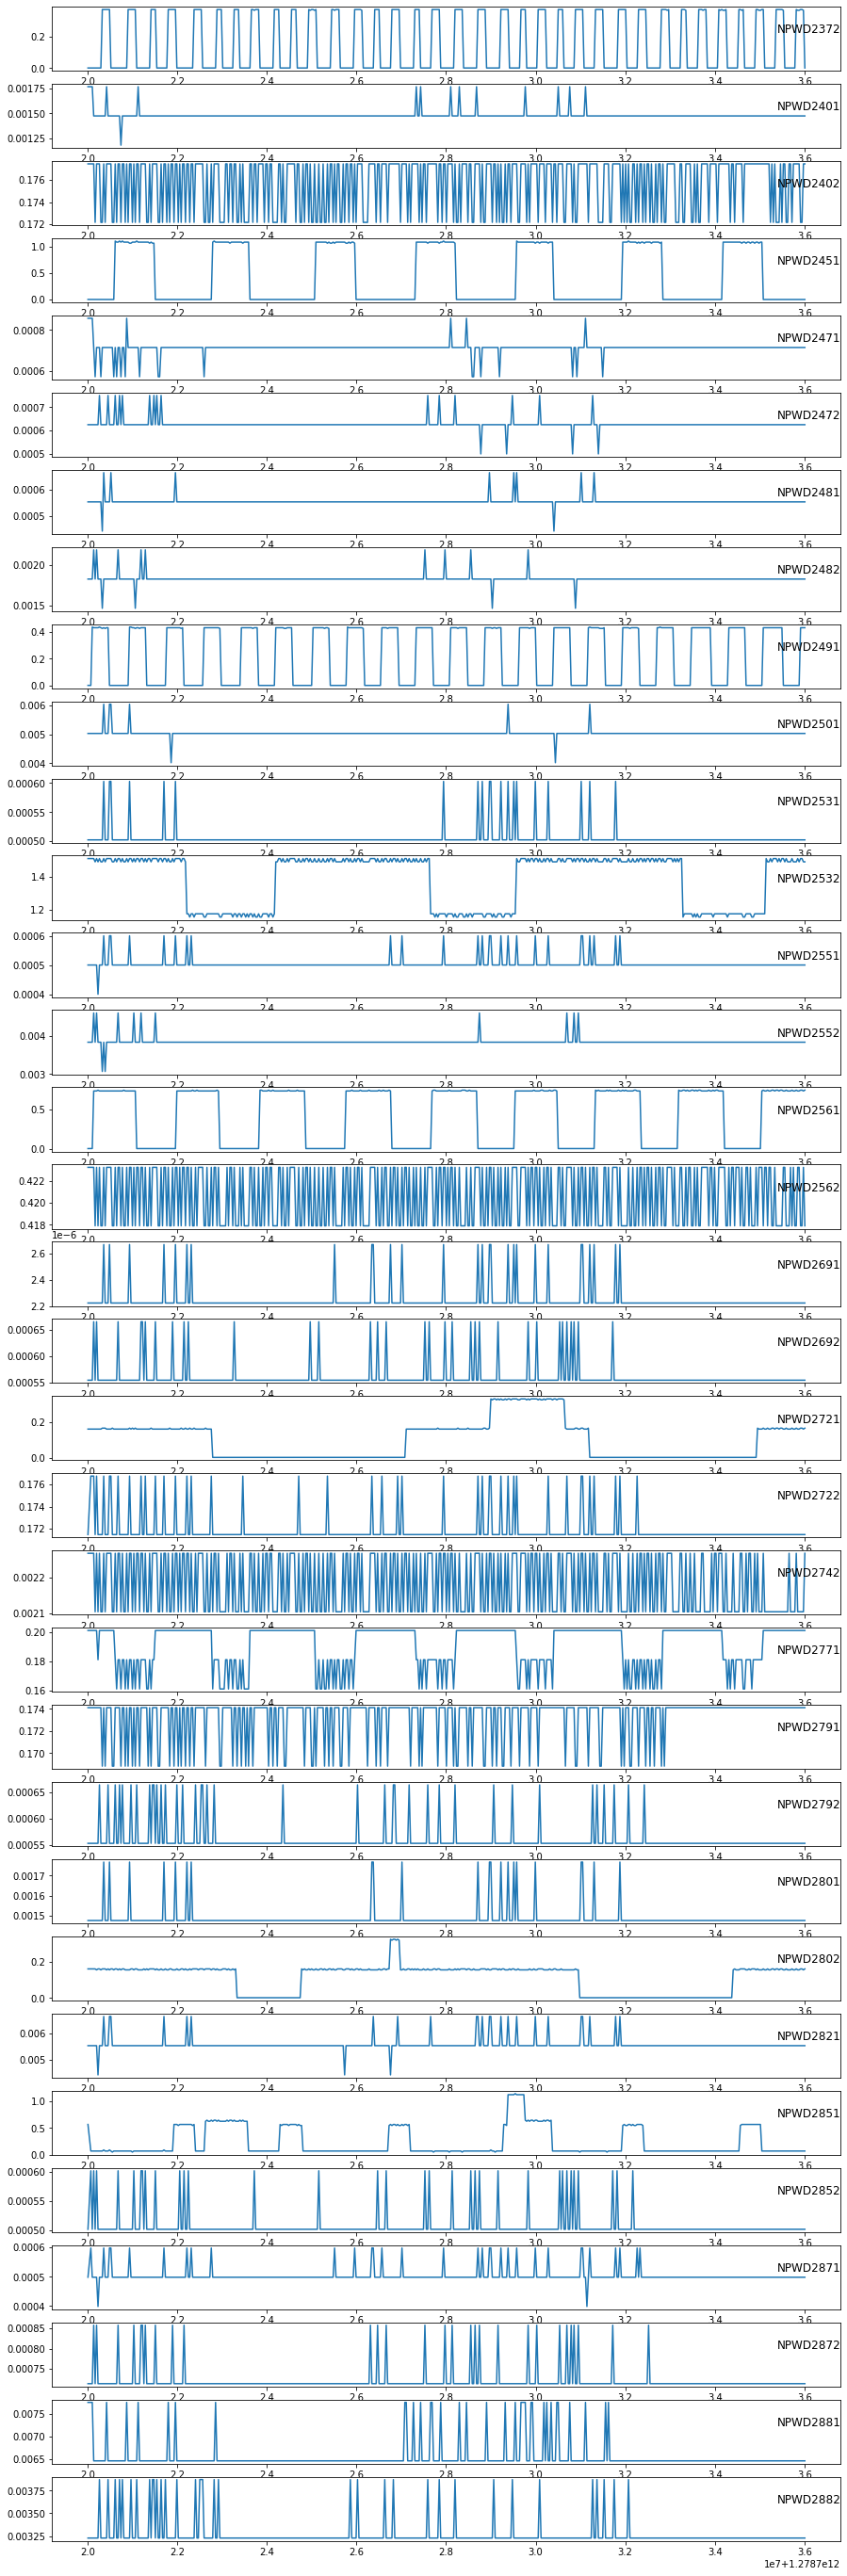

In [34]:
analyse_brute()

### SAAF

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  1


1 - context--2012-05-27_2014-04-14--saaf.csv


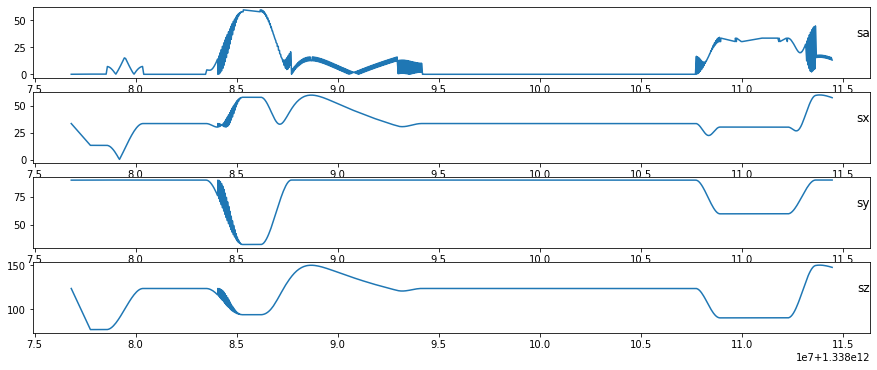

In [28]:
analyse_brute()

### FTL (pas forcemment pertinent pour l'instant)

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  4


4 - context--2012-05-27_2014-04-14--ftl.csv


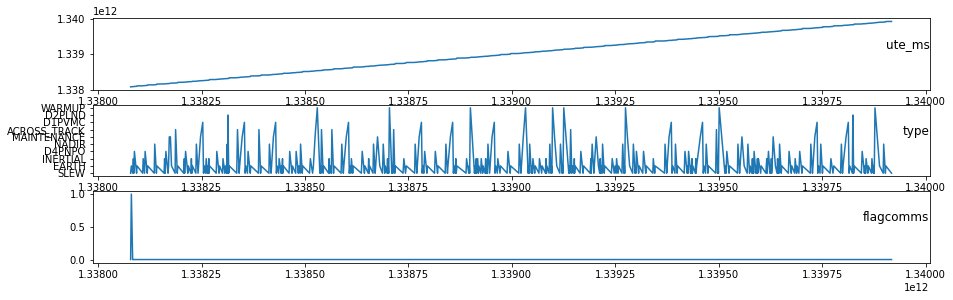

In [30]:
analyse_brute()

### LTDATA

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  9


9 - context--2012-05-27_2014-04-14--ltdata.csv


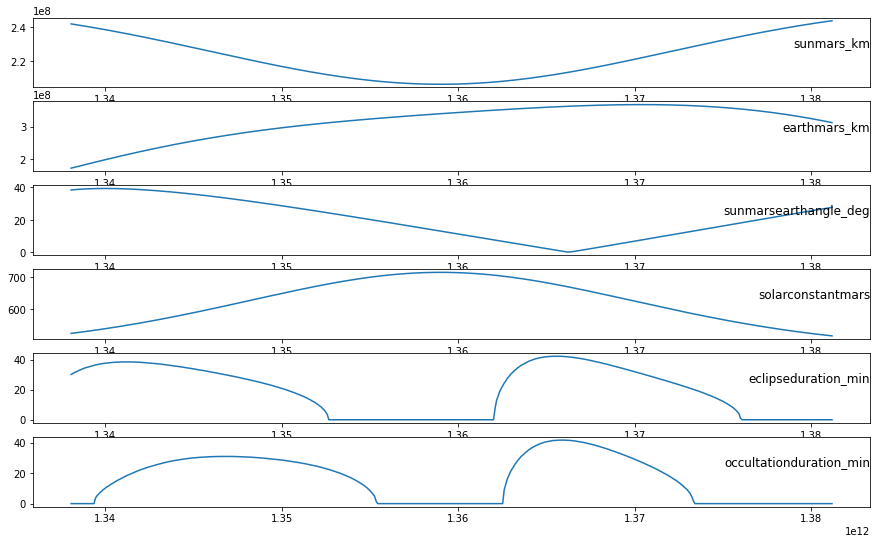

In [31]:
analyse_brute()

## Affichage des dataframe de variables qualitatives

### DMOP

In [32]:
file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
data = pd.read_csv(file_name, sep=",", index_col=0)
data

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  0


0 - context--2012-05-27_2014-04-14--dmop.csv


,subsystem
ut_ms,
1338149558000,MAPO.0000010705
1338159842000,PENS.0000005051
1338161648000,PENE.0000005051
1338161649000,PENE.0000005051
1338162138000,MPER.0000000705
...,...
1397426559000,AACFM01A
1397426620000,ATTT305P
1397426830000,ATMB228K


### EVTF

In [33]:
file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
data = pd.read_csv(file_name, sep=",", index_col=0)
data

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  2


2 - context--2012-05-27_2014-04-14--evtf.csv


,description
ut_ms,
1338078195000,MRB_AOS_10
1338078593000,MAD_LOS_10_/_RTLT_01146
1338078621000,CEB_LOS_10_/_RTLT_01146
1338079136000,MAD_LOS_08_/_RTLT_01146
1338080171000,MAD_LOS_05_/_RTLT_01146
...,...
1397429515000,MLG_AOS_10_/_RTLT_00616
1397432570000,MSL_AOS_05
1397433104000,MSL_AOS_10


### FTL

In [35]:
file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
data = pd.read_csv(file_name, sep=",", index_col=0)
data

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  4


4 - context--2012-05-27_2014-04-14--ftl.csv


,ute_ms,type,flagcomms
utb_ms,,,
1338078562000,1338080362000,SLEW,False
1338080362000,1338083482000,EARTH,True
1338083482000,1338085282000,SLEW,False
1338085282000,1338086202000,INERTIAL,False
1338086202000,1338087712000,SLEW,False
...,...,...,...
1397410691000,1397411591000,EARTH,False
1397411591000,1397413391000,SLEW,False
1397413391000,1397421159000,WARMUP,False


In [6]:
file_name = selection(folder = FOLDER, search = f"*{YEAR}*", first = False)
data = pd.read_csv(file_name, sep=",", index_col=0)
data

0 - context--2012-05-27_2014-04-14--dmop.csv
1 - context--2012-05-27_2014-04-14--saaf.csv
2 - context--2012-05-27_2014-04-14--evtf.csv
3 - power--2010-07-10_2012-05-27.csv
4 - context--2012-05-27_2014-04-14--ftl.csv
5 - context--2010-07-10_2012-05-27--ftl.csv
6 - context--2010-07-10_2012-05-27--ltdata.csv
7 - context--2010-07-10_2012-05-27--evtf.csv
8 - power--2012-05-27_2014-04-14.csv
9 - context--2012-05-27_2014-04-14--ltdata.csv
10 - context--2010-07-10_2012-05-27--saaf.csv
11 - context--2010-07-10_2012-05-27--dmop.csv


Selection :  3


3 - power--2010-07-10_2012-05-27.csv


/home/yamsok/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
ut_ms,,,,,,,,,,,,,,,,,,,,,
1278720008577,0.001821,0.001769,0.177440,0.006019,0.000857,0.000626,0.000554,0.001827,0.002419,0.005028,...,0.000553,0.001474,0.161594,0.005547,0.568060,0.000501,0.000499,0.000714,0.007748,0.003227
1278720072577,0.001821,0.001769,0.177440,0.006019,0.000857,0.000626,0.000554,0.001827,0.002016,0.005028,...,0.000553,0.001474,0.161594,0.005547,0.069760,0.000602,0.000598,0.000714,0.007748,0.003227
1278720104559,0.001821,0.001769,0.177440,0.006019,0.000857,0.000626,0.000554,0.001827,0.435523,0.005028,...,0.000553,0.001474,0.161594,0.005547,0.069760,0.000501,0.000499,0.000714,0.007748,0.003227
1278720136566,0.002185,0.001474,0.177440,0.005015,0.000714,0.000626,0.000554,0.002192,0.430256,0.005028,...,0.000553,0.001474,0.161594,0.005547,0.069760,0.000602,0.000499,0.000857,0.006457,0.003227
1278720168562,0.001821,0.001474,0.172173,0.005015,0.000571,0.000626,0.000554,0.001827,0.430256,0.005028,...,0.000553,0.001474,0.161594,0.005547,0.069760,0.000501,0.000499,0.000714,0.006457,0.003227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1338076649753,0.001821,0.001474,0.177440,0.005015,0.000714,0.006247,0.000554,0.001827,0.002016,0.005028,...,0.000996,0.001769,0.161594,0.006657,0.647788,0.000501,0.000598,0.000714,0.006457,0.003227
1338076681758,0.001821,0.001474,0.177440,0.005015,0.000714,0.001001,0.000554,0.001827,0.002016,0.006033,...,0.000996,0.001769,0.161594,0.006657,0.647788,0.000501,0.000598,0.000714,0.006457,0.003227
1338076713753,0.001821,0.001474,0.172173,0.005015,0.000714,0.001001,0.000554,0.001827,0.002016,0.005028,...,0.000996,0.001474,0.156296,0.005547,0.627856,0.000501,0.000499,0.000714,0.006457,0.003227


## Tentative d'interpolation pour caler ltdata sur le sampling rate de saaf

In [3]:
## import et concatenation des 3 années de données pour saaf

query_saaf = f"*{FOLDER}*saaf*"
file_name_list = glob.glob(query_saaf) 
file_name_list_sorted = np.sort(file_name_list)
saaf_data = []
for file_name in file_name_list_sorted:
    print(file_name)
    data = pd.read_csv(file_name, sep=",", index_col=0)
    saaf_data.append(data)
saaf = pd.concat(saaf_data)
saaf

data/train_set/context--2008-08-22_2010-07-10--saaf.csv


/home/yamsok/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


data/train_set/context--2010-07-10_2012-05-27--saaf.csv
data/train_set/context--2012-05-27_2014-04-14--saaf.csv


,sa,sx,sy,sz
ut_ms,,,,
1219363213000,0.32,14.55,90.32,104.55
1219363235000,0.34,14.56,90.34,104.55
1219363295000,0.34,14.56,90.34,104.55
1219363355000,0.34,14.56,90.34,104.55
1219363415000,0.34,14.56,90.34,104.55
...,...,...,...,...
1397433344000,1.41,1.57,88.59,89.32
1397433404000,1.41,1.57,88.59,89.32
1397433464000,1.41,1.57,88.59,89.32


In [4]:
## import et concatenation des 3 années de données pour ltdata
query_ltdata = f"*{FOLDER}*ltdata*"
file_name_list = glob.glob(query_ltdata) 
file_name_list_sorted = np.sort(file_name_list) # ordonne selon l'année
ltdata_data = []
for file_name in file_name_list_sorted:
    print(file_name)
    data = pd.read_csv(file_name, sep=",", index_col=0)
    ltdata_data.append(data)
ltdata = pd.concat(ltdata_data)
ltdata

data/train_set/context--2008-08-22_2010-07-10--ltdata.csv
data/train_set/context--2010-07-10_2012-05-27--ltdata.csv
data/train_set/context--2012-05-27_2014-04-14--ltdata.csv


,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min
ut_ms,,,,,,
1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000
1219449600000,2.418002e+08,3.563037e+08,19.390075,522.863537,1.783333,26.933333
1219536000000,2.416603e+08,3.568432e+08,19.214734,523.468926,0.000000,26.583333
1219622400000,2.415193e+08,3.573744e+08,19.039052,524.080161,0.000000,26.100000
1219708800000,2.413773e+08,3.578973e+08,18.863029,524.697233,0.000000,25.750000
...,...,...,...,...,...,...
1397001600000,2.426166e+08,9.285879e+07,1.525746,519.350386,32.816667,33.016667
1397088000000,2.424833e+08,9.270270e+07,1.779344,519.921585,32.650000,32.900000
1397174400000,2.423488e+08,9.257788e+07,2.330063,520.498670,32.516667,32.816667


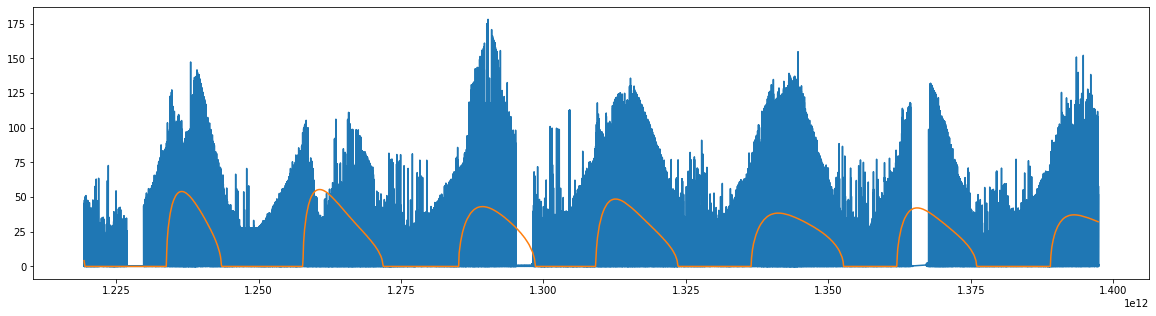

In [37]:
# affichage superposé avant interpolation (sert à rien)
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(saaf.index, saaf["sa"])

ax.plot(ltdata.index, ltdata["eclipseduration_min"])
plt.show()

In [33]:
saaf.index

Int64Index([1219363213000, 1219363235000, 1219363295000, 1219363355000,
            1219363415000, 1219363475000, 1219363535000, 1219363595000,
            1219363655000, 1219363715000,
            ...
            1397433044000, 1397433104000, 1397433164000, 1397433224000,
            1397433284000, 1397433344000, 1397433404000, 1397433464000,
            1397433524000, 1397433584000],
           dtype='int64', name='ut_ms', length=3322125)

In [127]:
pd.concat([ltdata, saaf])

,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min,sa,sx,sy,sz
ut_ms,,,,,,,,,,
1219363200000,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,NaN,NaN,NaN,NaN
1219449600000,2.418002e+08,3.563037e+08,19.390075,522.863537,1.783333,26.933333,NaN,NaN,NaN,NaN
1219536000000,2.416603e+08,3.568432e+08,19.214734,523.468926,0.000000,26.583333,NaN,NaN,NaN,NaN
1219622400000,2.415193e+08,3.573744e+08,19.039052,524.080161,0.000000,26.100000,NaN,NaN,NaN,NaN
1219708800000,2.413773e+08,3.578973e+08,18.863029,524.697233,0.000000,25.750000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1397433344000,NaN,NaN,NaN,NaN,NaN,NaN,1.41,1.57,88.59,89.32
1397433404000,NaN,NaN,NaN,NaN,NaN,NaN,1.41,1.57,88.59,89.32
1397433464000,NaN,NaN,NaN,NaN,NaN,NaN,1.41,1.57,88.59,89.32


In [8]:
# Copie des df puis concatenation 
# on trie par date -> ça intercale les mesures ltdata au milieu de celles de saaf
# on interpole tout ce qui manque (NaN) linéairement avec la méthode interpolate de pandas
# et PAF
saaf_temp = saaf.copy()
saaf_temp['date'] = saaf_temp.index
saaf_temp = saaf_temp.reset_index(drop=True)

ltdata_temp = ltdata.copy()
ltdata_temp['date'] = ltdata_temp.index
ltdata_temp = ltdata_temp.reset_index(drop=True)
combined = pd.concat([ltdata_temp, saaf_temp])
combined = combined.sort_values("date").reset_index(drop=True)
combined = combined.interpolate()
combined

,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min,date,sa,sx,sy,sz
0,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000,1219363200000,NaN,NaN,NaN,NaN
1,2.419388e+08,3.557563e+08,19.564997,522.264270,4.165589,27.399789,1219363213000,0.32,14.55,90.32,104.55
2,2.419388e+08,3.557565e+08,19.564918,522.264541,4.164511,27.399578,1219363235000,0.34,14.56,90.34,104.55
3,2.419387e+08,3.557568e+08,19.564838,522.264813,4.163433,27.399367,1219363295000,0.34,14.56,90.34,104.55
4,2.419387e+08,3.557570e+08,19.564759,522.265084,4.162355,27.399156,1219363355000,0.34,14.56,90.34,104.55
...,...,...,...,...,...,...,...,...,...,...,...
3324181,2.420765e+08,9.242161e+07,3.772391,521.670476,32.216667,32.633333,1397433344000,1.41,1.57,88.59,89.32
3324182,2.420765e+08,9.242161e+07,3.772391,521.670476,32.216667,32.633333,1397433404000,1.41,1.57,88.59,89.32
3324183,2.420765e+08,9.242161e+07,3.772391,521.670476,32.216667,32.633333,1397433464000,1.41,1.57,88.59,89.32
3324184,2.420765e+08,9.242161e+07,3.772391,521.670476,32.216667,32.633333,1397433524000,1.41,1.57,88.59,89.32


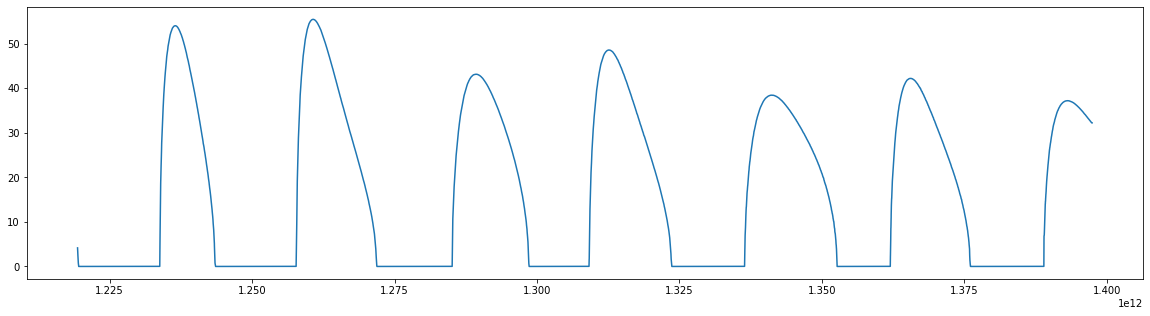

In [19]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(combined["date"], combined["eclipseduration_min"])
plt.show()

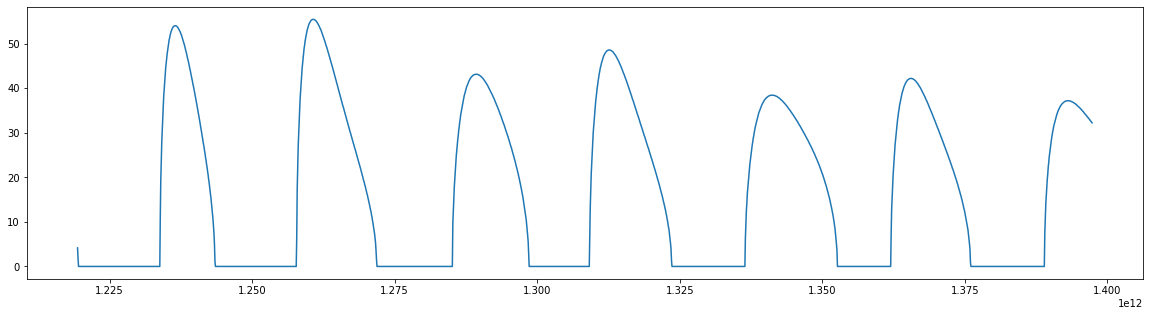

In [18]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ax.plot(ltdata.index, ltdata["eclipseduration_min"])
plt.show()